# General tasks and directions

- Add your name, today's date, and the assignment title to the designated cell.
- Write your answers in the cells that contain `Add your answer here.` line.
- Write your code in the cells that contain `# Add your implementation here.` line.
- Use autograder tests that are provided for your convenience.
- Don't change or delete any provided code (including [cell magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) such as `%%capture output`).


## Add your name, today's date, and the assignment title

author: Uddam Chea

date: 04/18/23

assignment: project3


# Project 3

*Using `pandas`, `matplotlib`, and `seaborn`*

This assignment is individual and you agree to submit your own work.


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame

np.set_printoptions(precision=2, suppress=True, linewidth=120)

pd.options.display.max_rows = 20

mpl.style.use("default")

plt.rc("figure", figsize=(12, 8))

sns.set()


## Task 0

Load the dataset from the provided file *housing.csv*.

In [2]:
df = pd.read_csv("housing.csv")
df.ocean_proximity = df.ocean_proximity.astype("category")

## Task 1

Use `pandas` to display a histogram of all numerical values in the dataset. Split the data into 50 bins and make sure subplots are not overlapping.

![Task 1](task1.png)

array([[<AxesSubplot:title={'center':'longitude'}>, <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>, <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>, <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]], dtype=object)

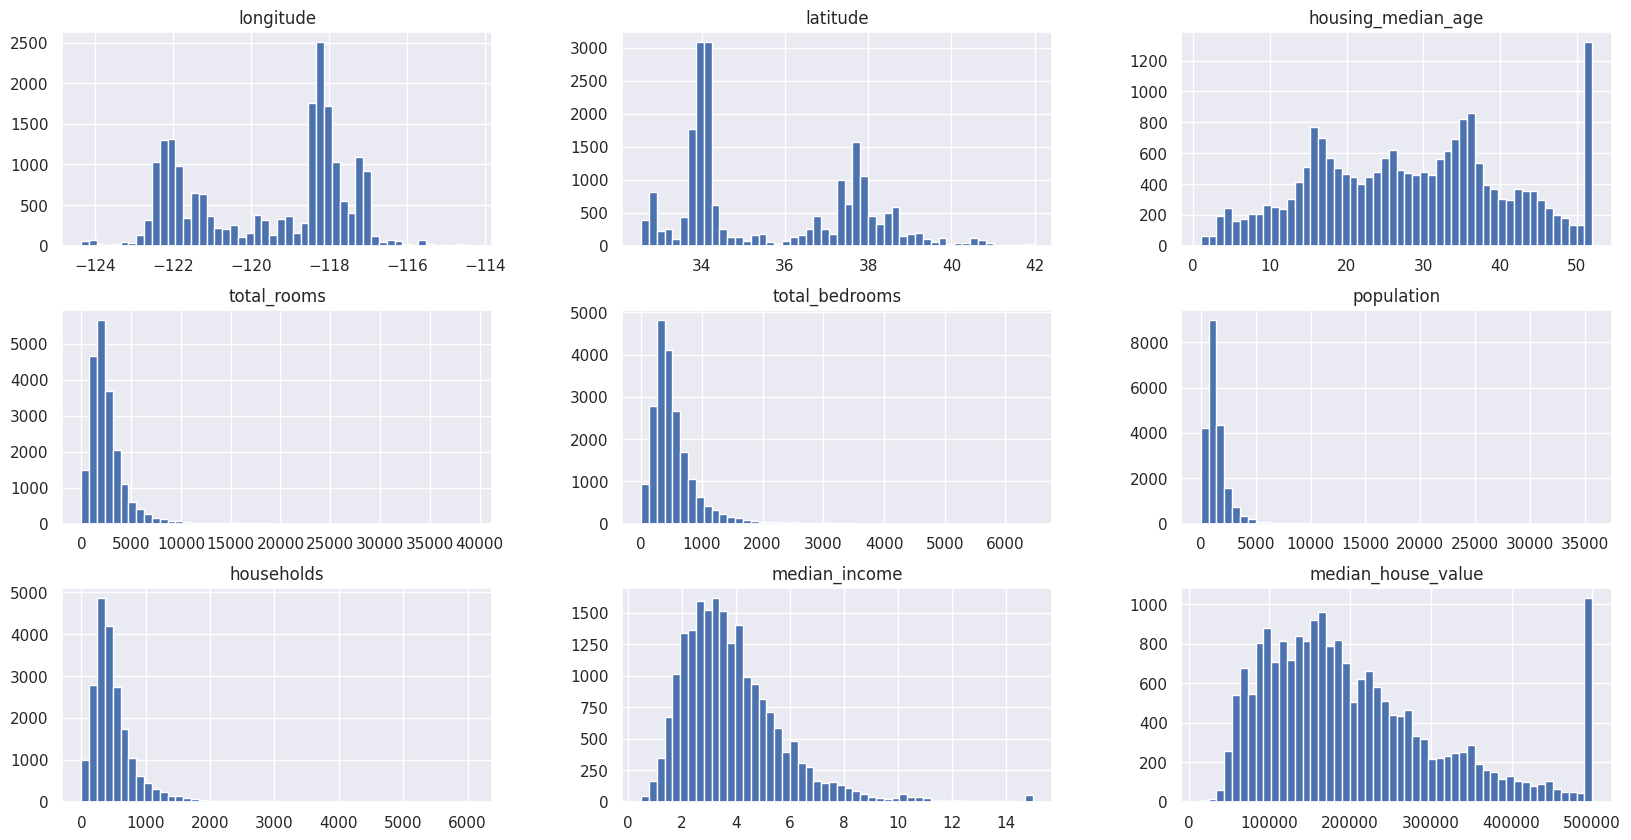

In [3]:
# Add your implementation here.
df.hist(bins=50, figsize=(20, 10))

## Task 2

Create an `income_category` attribute based on `median_income` with 5 categories ("low", "medium-low", "medium", "medium-high", and "high") with the following ranges: (0, 1.5], (1.5, 3], (3, 4.5], (4.5, 6], (6, 6+].

Use `pandas` to display a histrogram with the number of districts in each income category.

Don't forget to label axes.

![Task 2](task2.png)

Text(0, 0.5, 'Number of Districts')

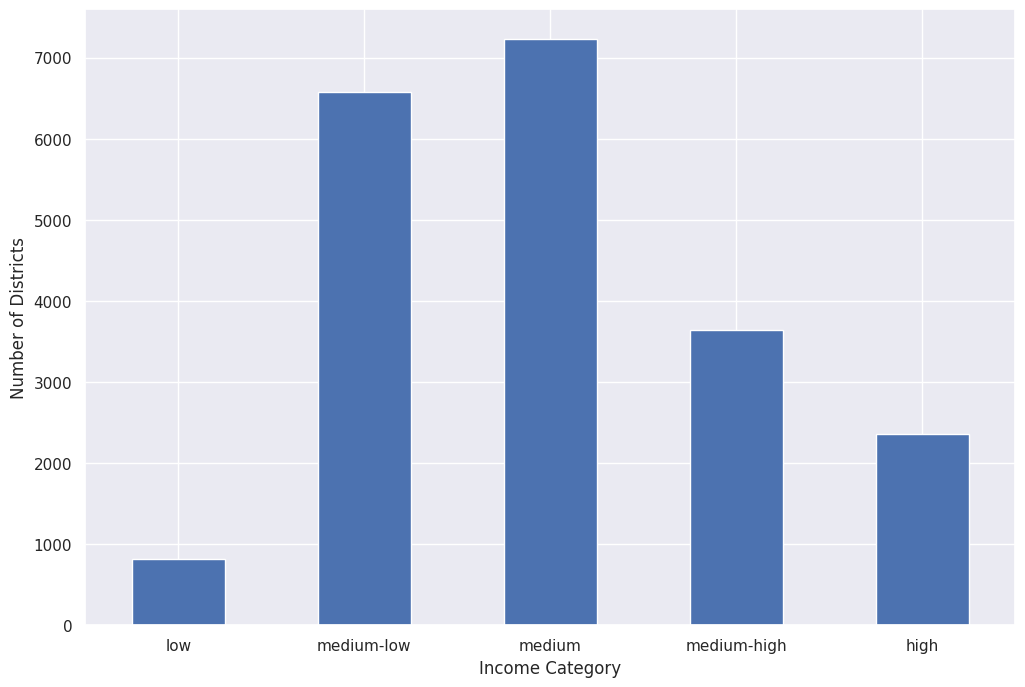

In [4]:
df['income_category'] = pd.cut(df['median_income'],
                               bins=[0, 1.5, 3, 4.5, 6, float('inf')],
                               labels=['low', 'medium-low', 'medium', 'medium-high', 'high'])
df.groupby('income_category')['median_income'].count().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Income Category')
plt.ylabel('Number of Districts')

## Task 3

Use `seaborn` to create a *scatterplot* of all districts with `longitude` and `latitude` as `x` and `y` axes respectively.

Use `ocean_proximity` as a `hue`.

Set `alpha` option to a low value so the places with high density of data points are more prominent.

![Task 3](task3.png)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

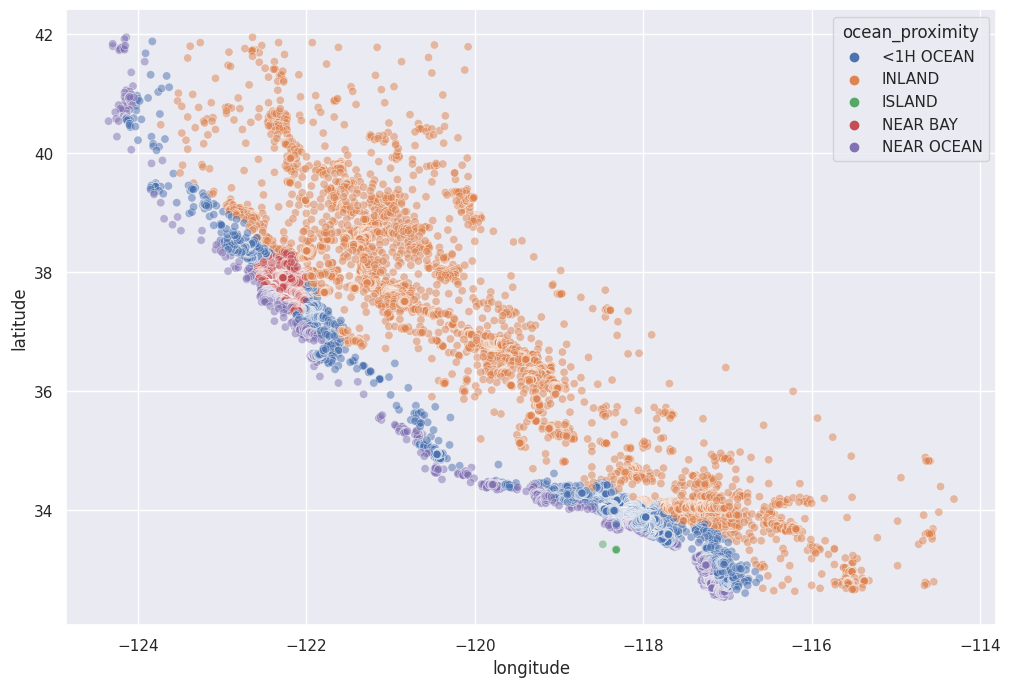

In [5]:
# Add your implementation here.
sns.scatterplot(data=df, x='longitude', y='latitude', hue='ocean_proximity', alpha=0.5)

## Task 4

Use `pandas` to create a `longitude`/`latitude` *scatterplot* of all districts using a colormap of your choice.

Size of each point should be the `population` (adjusted to avoid overlapping).

Color of each point should be the `median_house_value`.

[Choosing Colormaps in Matplotlib — Matplotlib 3.7.1 documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

![Task 4](task4.png)

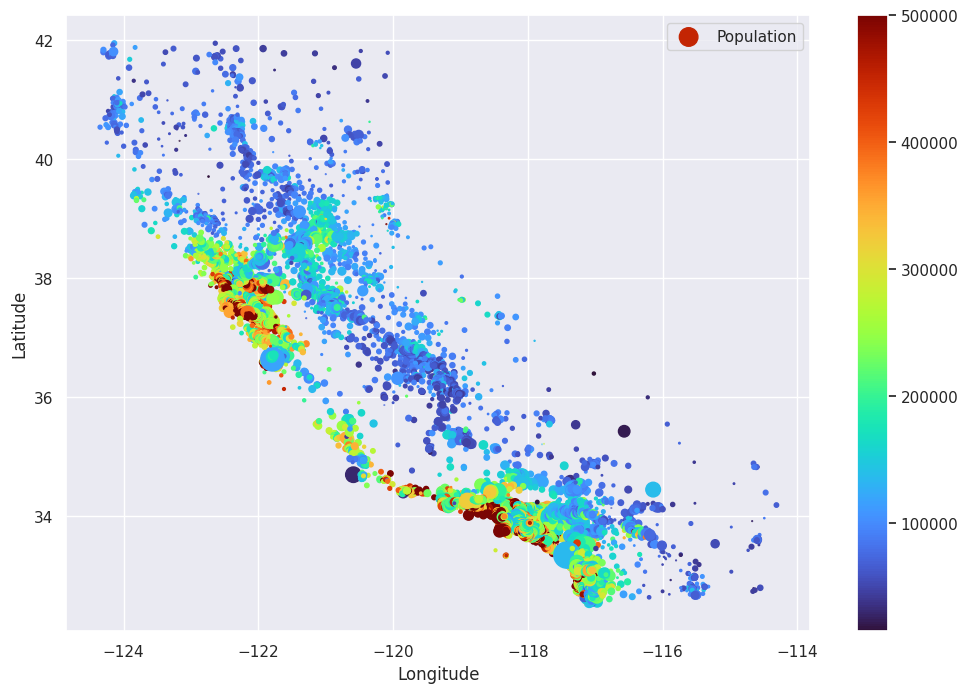

In [6]:
# Add your implementation here.
import warnings

warnings.filterwarnings("ignore", message="Auto-removal of grids")

plt.scatter(df['longitude'], df['latitude'], s=df['population']/100, c=df['median_house_value'], cmap="turbo")

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(["Population"])
plt.colorbar()

## Task 5

Use `pandas` to create a matrix of *scatterplots* of the following attributes mapped against one another: `median_house_value`, `median_income`, `total_rooms`, and `housing_median_age`.

![Task 5](task5.png)

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

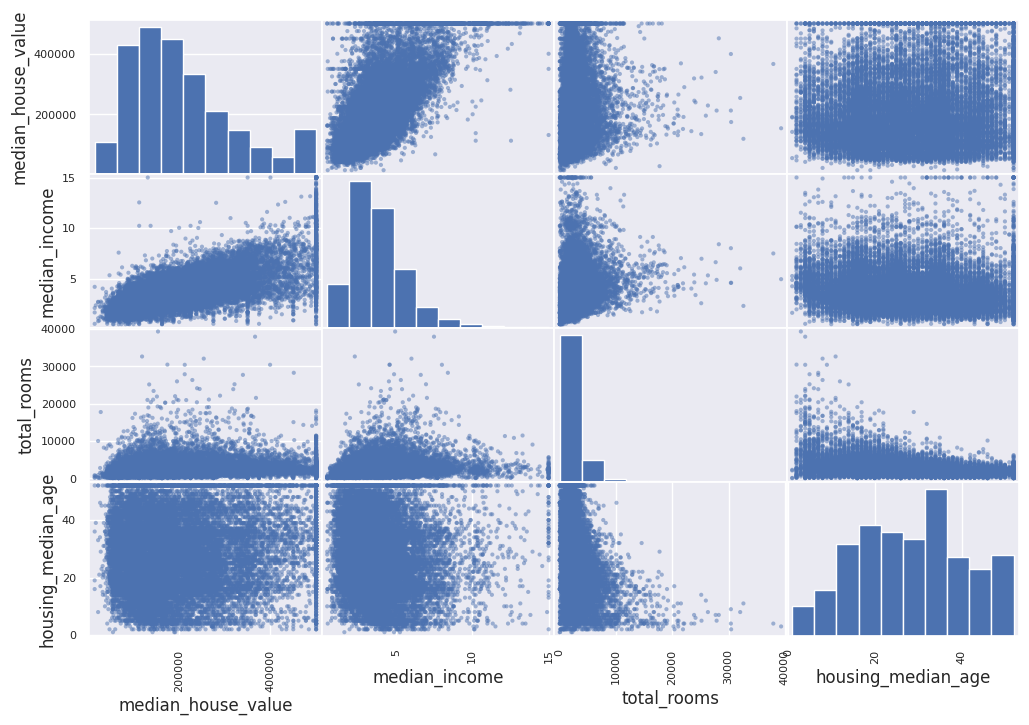

In [7]:
# Add your implementation here.
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(df[cols])

## Task 6

Use `seaborn` to create a matrix of *scatterplots* of the following attributes mapped against one another: `median_house_value`, `median_income`, `total_rooms`, and `housing_median_age`.

![Task 6](task6.png)

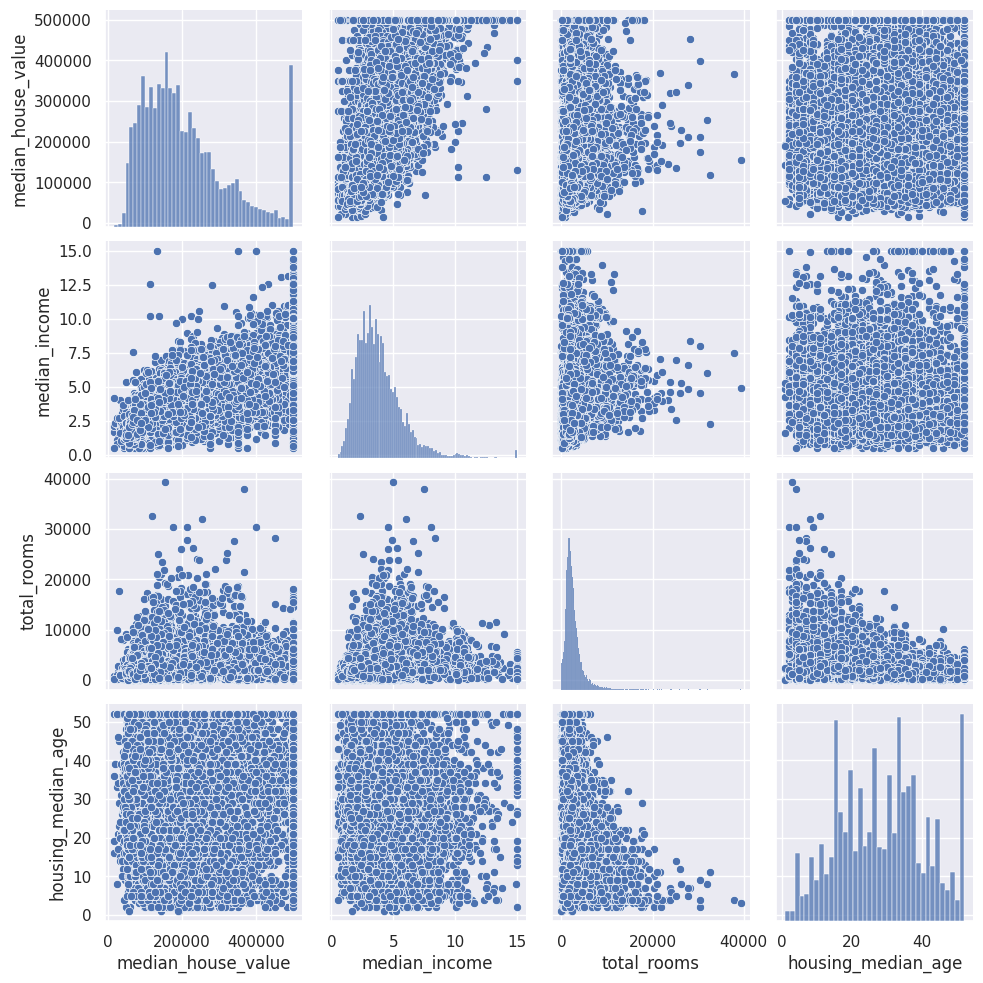

In [8]:
# Add your implementation here.
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(df[cols])

## Task 7

Use `seaborn` to build a *scatterplot* with `median_income` and `median_house_value` as `x` and `y` axes respectively.

![Task 7](task7.png)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

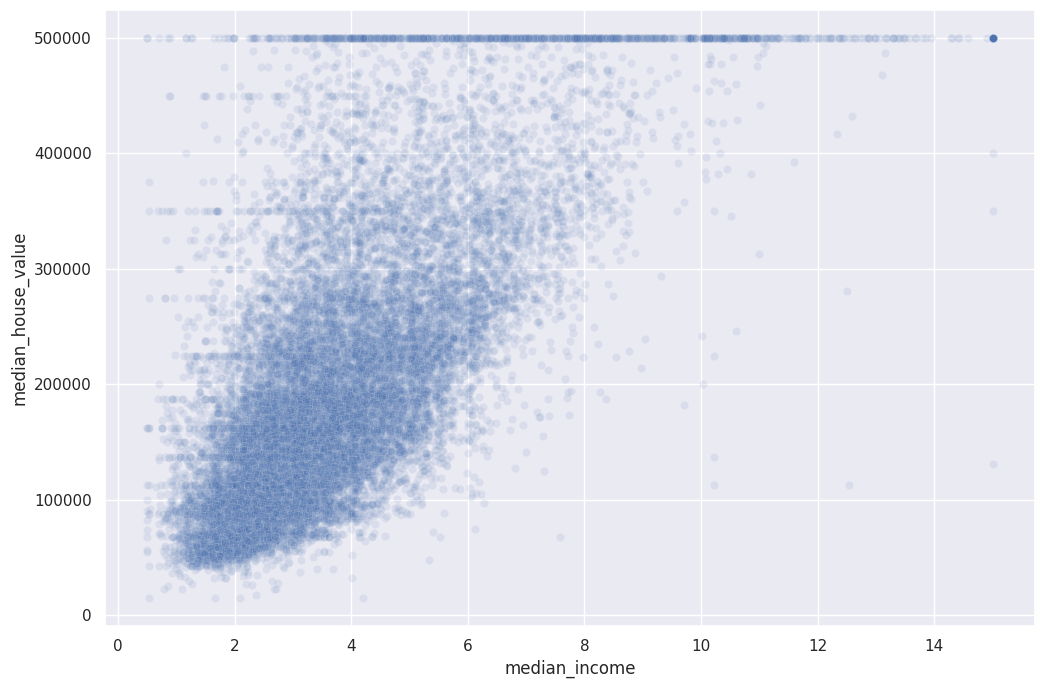

In [9]:
# Add your implementation here.
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.1)

## Task 8

From the figure above you can see that `median_house_value` is capped at `500 000` or close to it. Remove rows where the `median_house_value` is above `500 000` and use `seaborn` to build a *regplot* with `median_income` and `median_house_value` as `x` and `y` axes respectively.

![Task 8](task8.png)

Text(0, 0.5, 'median_house_value')

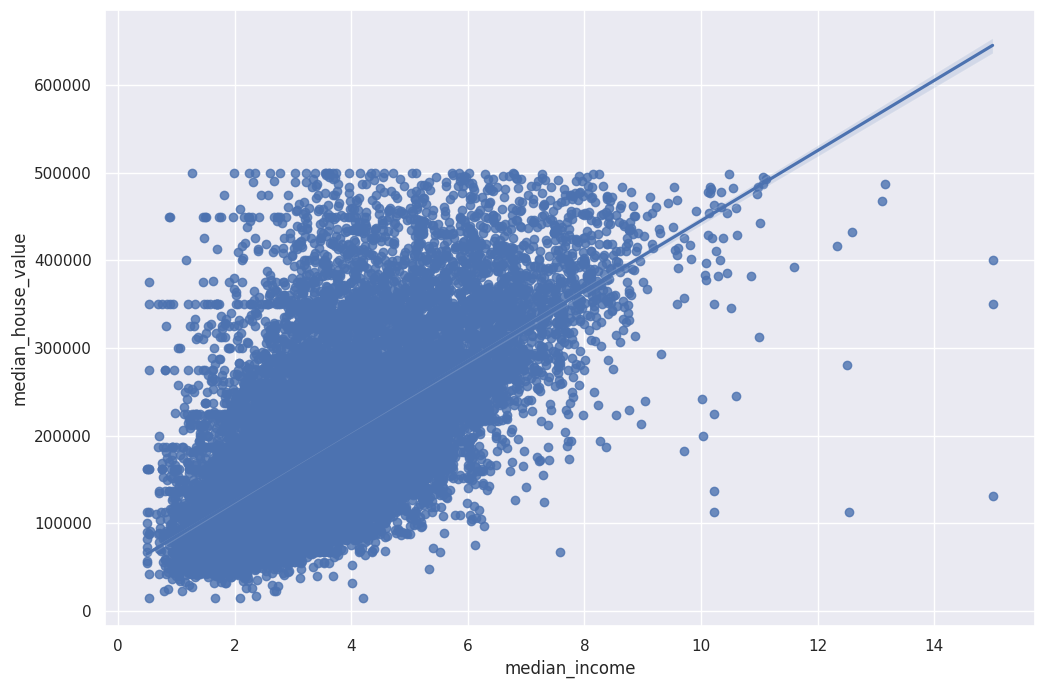

In [10]:
# Add your implementation here.
df = df[df['median_house_value'] <= 500000]

sns.regplot(data=df, x='median_income', y='median_house_value')

plt.xlabel('median_income')
plt.ylabel('median_house_value')

## Task 9

Use `seaborn` to build boxplots with number of households and ocean proximity as `x` and `y` axes respectively.

![Task 9](task9.png)

Text(0, 0.5, 'ocean_proximity')

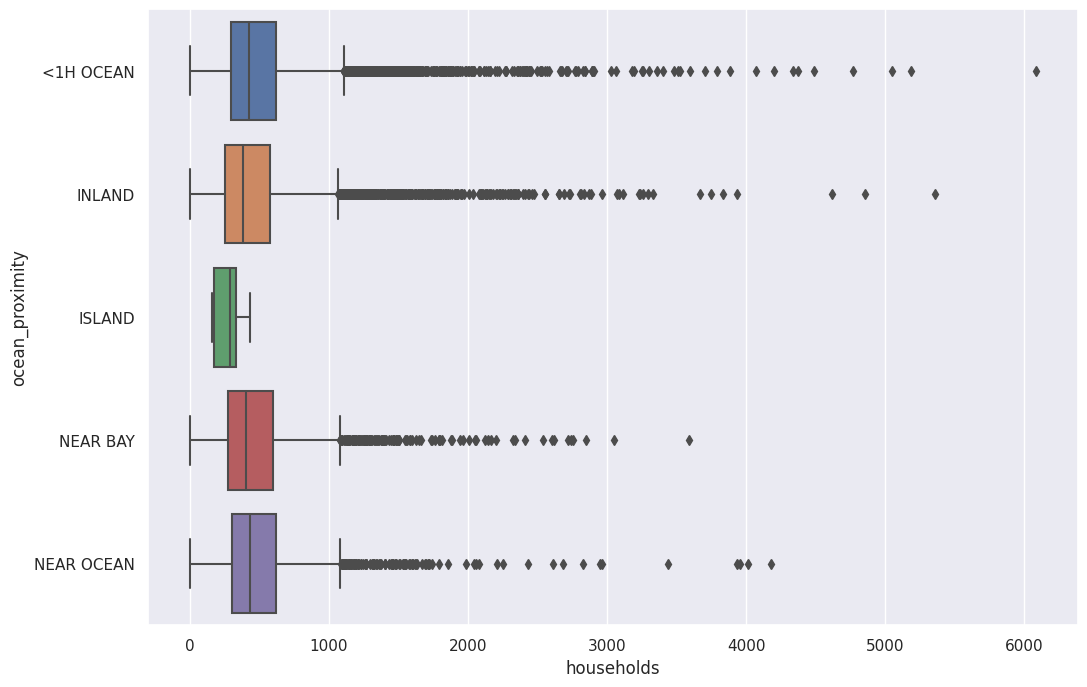

In [11]:
# Add your implementation here.
sns.boxplot(data=df, x='households', y='ocean_proximity')

plt.xlabel('households')
plt.ylabel('ocean_proximity')

## Task 10

Use `seaborn` to build a *scatterplot* of `total_rooms` / `total_bedrooms` and `income_category` as `hue`.

![Task 10](task10.png)

Text(0, 0.5, 'total_bedrooms')

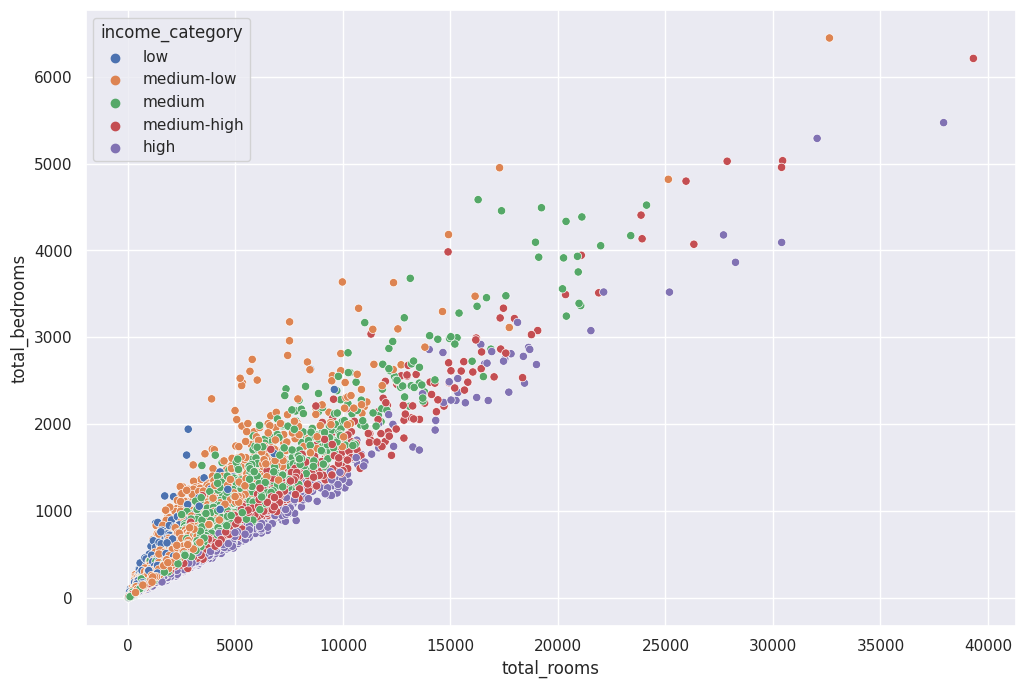

In [12]:
# Add your implementation here.
sns.scatterplot(data=df, x='total_rooms', y='total_bedrooms', hue='income_category')

plt.xlabel('total_rooms')
plt.ylabel('total_bedrooms')

## Submission Checklist

- [ ] Your name, today's date, and the assignment title in the designated cell.
- [ ] Your answers in the designated cells (if required).
- [ ] Your code runs and produces the expected output.
- [ ] The validity of your code is verified by autograders (if provided).
- [ ] Restart the kernel and run all cells (in the menubar, select *Kernel*, then *Restart Kernel and Run All Cells*).
- [ ] Save the notebook.
- [ ] Submit the assignment.
